In [14]:
from src.training.training import load_model
from src.models.model1 import AutoregressiveModel_Cell
import torch.nn as nn
from torch.optim import Adam
from paths import CHECKPOINT_DIR
import os
from src.data.datasets import Hpose
from torch.utils.data import DataLoader
from paths import DATASET_DIR
from src.util.visualization import draw_keypoint_sequence

In [15]:
model = AutoregressiveModel_Cell(256,256, residual_connection=False)
optimizer = Adam(model.parameters(), lr=0.001)
model, optimizer, epoch = load_model(model, optimizer, os.path.join(CHECKPOINT_DIR, "Autoregressive-256-256-MAE-Sum-NoResidual-noTF/chekpoint_epoch_28.pth"))
model.eval()

AutoregressiveModel_Cell(
  (encoder): Encoder(
    (encode_layer): Linear(in_features=34, out_features=256, bias=True)
  )
  (decoder): Decoder(
    (decode_layer): Linear(in_features=256, out_features=34, bias=True)
  )
  (lstm1): LSTMCell(256, 256)
  (lstm2): LSTMCell(256, 256)
)

In [20]:

validation_dataset = Hpose(subset="valid")
dataloader = DataLoader(validation_dataset, batch_size=2, shuffle=False)
input, gt = next(iter(dataloader))
print(input.size())
output = model(input)
import torch

lossfunc = nn.MSELoss()

best_loss = 100.0
best_batch = 0
for batch, (input, gt) in enumerate(dataloader):
    prediction = model(input)
    loss = lossfunc(gt, prediction)
    if loss < best_loss:
        best_loss = loss.item()
        best_batch = batch
    



torch.Size([2, 10, 34])


In [21]:
best_batch

1027

In [28]:
for batch, (input, gt) in enumerate(dataloader):
    if batch == best_batch + 1:
        output = model(input)
        input, gt, output = draw_keypoint_sequence(torch.mul(input, 1000.0), torch.mul(gt, 1000.0), torch.mul(output, 1000.0), sequence_number=1)
        whole = torch.cat([input, gt, output])

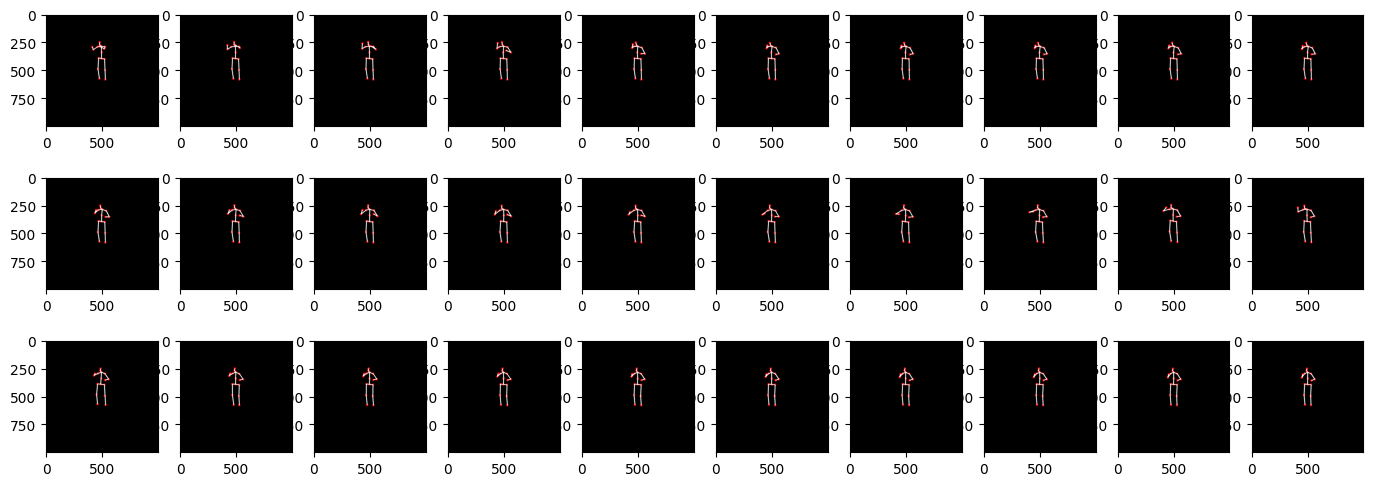

In [29]:

import numpy as np
import matplotlib.pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(17, 6))
columns = 10
rows = 3

# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    img = torch.permute(whole[i], (1,2,0)).numpy()
    ax.append( fig.add_subplot(rows, columns, i+1) )
    plt.imshow(img)


plt.show()